Task 1

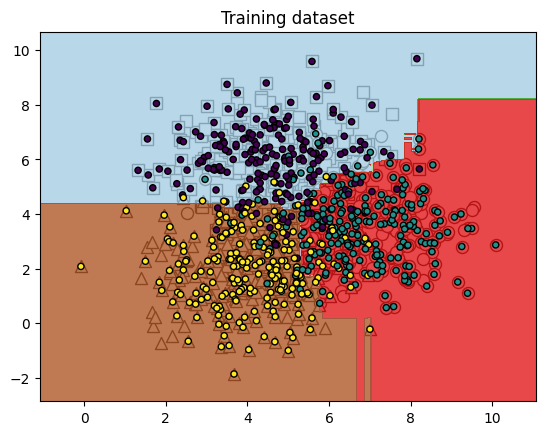

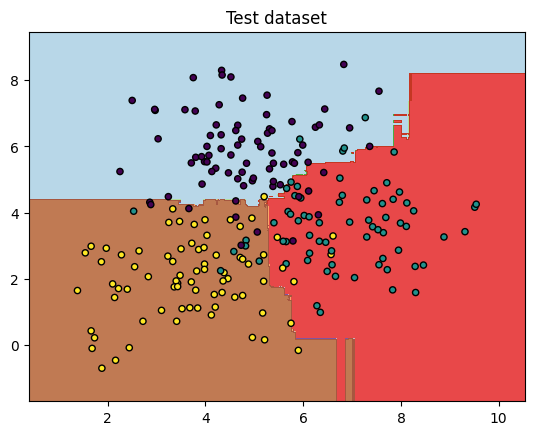


########################################

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.91      0.86      0.88       221
     Class-1       0.84      0.87      0.86       230
     Class-2       0.86      0.87      0.86       224

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675

########################################

########################################

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.92      0.85      0.88        79
     Class-1       0.86      0.84      0.85        70
     Class-2       0.84      0.92      0.88        76

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225

###########################

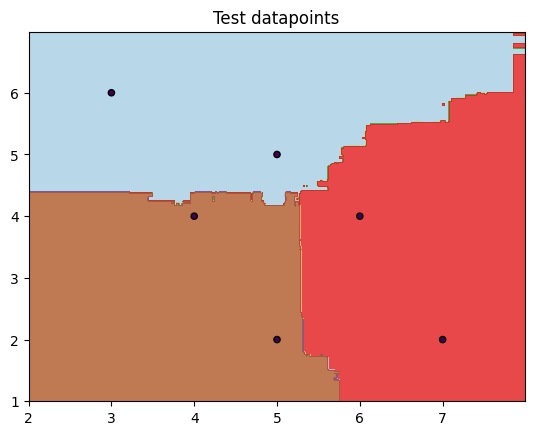

In [7]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Функція для візуалізації класифікатора
def visualize_classifier(classifier, X, y, title='Dataset'):
    # Створення сітки для передбачень
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Прогнозування для кожної точки сітки
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Побудова графіка
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.show()

# Argument parser
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Classify data using Ensemble Learning techniques')
    parser.add_argument('--classifier-type', dest='classifier_type', required=True, choices=['rf', 'erf'], help="Type of classifier to use; can be either 'rf' or 'erf'")
    return parser

if __name__ == '__main__':
    import sys
    sys.argv = ['']  # Видалення аргументів командного рядка
    args = build_arg_parser().parse_args(['--classifier-type', 'rf'])  # Ручне визначення аргументів

    classifier_type = args.classifier_type

    # Завантаження вхідних даних
    input_file = 'data_random_forests.txt'
    data = np.loadtxt(input_file, delimiter=',')
    X, y = data[:, :-1], data[:, -1]

    # Розділення вхідних даних за класами
    class_0 = X[y == 0]
    class_1 = X[y == 1]
    class_2 = X[y == 2]

    # Візуалізація вхідних даних
    plt.figure()
    plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='s')
    plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='o')
    plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='^')
    plt.title('Input data')

    # Розділення даних на навчальні та тестові
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

    # Класифікатор на основі ансамблевого навчання
    params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
    if classifier_type == 'rf':
        classifier = RandomForestClassifier(**params)
    else:
        classifier = ExtraTreesClassifier(**params)

    classifier.fit(X_train, y_train)
    visualize_classifier(classifier, X_train, y_train, 'Training dataset')

    y_test_pred = classifier.predict(X_test)
    visualize_classifier(classifier, X_test, y_test, 'Test dataset')

    # Оцінка продуктивності класифікатора
    class_names = ['Class-0', 'Class-1', 'Class-2']
    print("\n" + "#" * 40)
    print("\nClassifier performance on training dataset\n")
    print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
    print("#" * 40 + "\n")

    print("#" * 40)
    print("\nClassifier performance on test dataset\n")
    print(classification_report(y_test, y_test_pred, target_names=class_names))
    print("#" * 40 + "\n")

    # Обчислення впевненості
    test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])

    print("\nConfidence measure:")
    for datapoint in test_datapoints:
        probabilities = classifier.predict_proba([datapoint])[0]
        predicted_class = 'Class-' + str(np.argmax(probabilities))
        print('\nDatapoint:', datapoint)
        print('Predicted class:', predicted_class)

    # Візуалізація тестових точок
    visualize_classifier(classifier, test_datapoints, [0] * len(test_datapoints), 'Test datapoints')
    plt.show()

Task 2

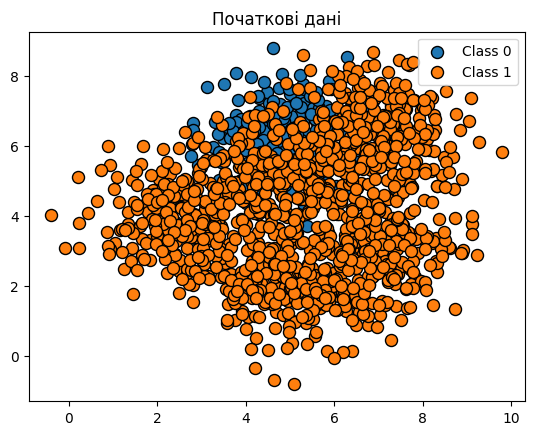

Розподіл класів до обробки: {0.0: 250, 1.0: 1250}
Розподіл класів після балансування: {0.0: 1250, 1.0: 1250}

Матриця плутанини:
[[296   1]
 [ 38 290]]

Звіт про класифікацію:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       297
         1.0       1.00      0.88      0.94       328

    accuracy                           0.94       625
   macro avg       0.94      0.94      0.94       625
weighted avg       0.94      0.94      0.94       625



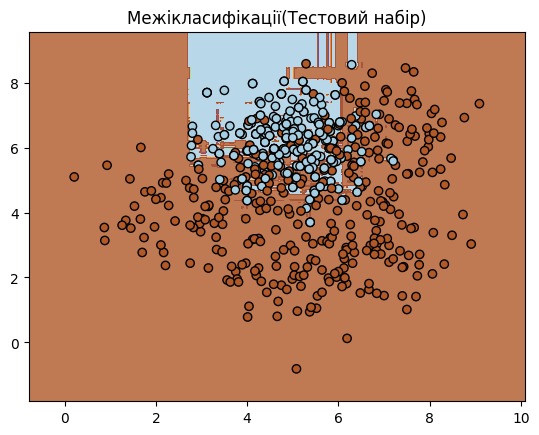

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

# Завантаження даних
data = np.loadtxt('data_imbalance.txt', delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Візуалізація початкових даних
class_0 = X[y == 0]
class_1 = X[y == 1]
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, label="Class 0", edgecolors="black")
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, label="Class 1", edgecolors="black")
plt.title("Початкові дані")
plt.legend()
plt.show()

# Аналіз дисбалансу
unique, counts = np.unique(y, return_counts=True)
print("Розподіл класів до обробки:", dict(zip(unique, counts)))

# Балансування даних
X_class_0 = X[y == 0]
X_class_1 = X[y == 1]
if counts[0] > counts[1]:
  X_class_1_resampled = resample(X_class_1, replace=True, n_samples=counts[0], random_state=42)
  X_resampled = np.vstack((X_class_0, X_class_1_resampled))
  y_resampled = np.hstack((np.zeros(len(X_class_0)),np.ones(len(X_class_1_resampled))))
else:
  X_class_0_resampled = resample(X_class_0, replace=True, n_samples=counts[1], random_state=42)
  X_resampled = np.vstack((X_class_0_resampled, X_class_1))
  y_resampled = np.hstack((np.zeros(len(X_class_0_resampled)),np.ones(len(X_class_1))))

# Перевірка після балансування
unique, counts = np.unique(y_resampled, return_counts=True)
print("Розподіл класів після балансування:", dict(zip(unique, counts)))

# Розділення на навчальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Побудова класифікатора
classifier = RandomForestClassifier(n_estimators=100,
class_weight='balanced',random_state=42)
classifier.fit(X_train, y_train)

# Оцінка якості моделі
y_pred = classifier.predict(X_test)
print("\nМатриця плутанини:")
print(confusion_matrix(y_test, y_pred))
print("\nЗвіт про класифікацію:")
print(classification_report(y_test, y_pred))

# Візуалізація меж класифікації
def plot_decision_boundaries(classifier, X, y, title):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min,
  y_max, 0.01))
  Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
  plt.title(title)
  plt.show()

# Виклик функції для візуалізації тестових даних
plot_decision_boundaries(classifier, X_test, y_test, "Межікласифікації(Тестовий набір)")

Task 3

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

# Завантаження даних
input_file = 'data_random_forests.txt' # Шлях до файлу
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Розділення даних на навчальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.25, random_state=5
)

# Визначення сітки значень параметрів
parameter_grid = [{'n_estimators': [100], 'max_depth': [2, 4, 7, 12, 16] },{'max_depth': [4], 'n_estimators': [25, 50, 100, 250]}]
metrics = ['precision_weighted', 'recall_weighted']

# Перебір параметрів
for metric in metrics:
  print("\n### Searching optimal parameters for", metric)

  classifier = GridSearchCV(
    ExtraTreesClassifier(random_state=0),
    parameter_grid,
    cv=5, # Кількість фолдів для крос-валідації
    scoring=metric
  )

  # Навчання моделі
  classifier.fit(X_train, y_train)

  # Виведення результатів
  print("\nGrid scores for the parameter grid:\n")
  results = classifier.cv_results_

  for mean, params in zip(results['mean_test_score'], results['params']):
    print(params, '-->', round(mean, 3))
    print("\nBest parameters for", metric, ":\n", classifier.best_params_)

# Виведення результатів роботи класифікатора
y_pred = classifier.predict(X_test)
print("\nPerformance report on test set:\n")
print(classification_report(y_test, y_pred))


### Searching optimal parameters for precision_weighted

Grid scores for the parameter grid:

{'max_depth': 2, 'n_estimators': 100} --> 0.85

Best parameters for precision_weighted :
 {'max_depth': 2, 'n_estimators': 100}
{'max_depth': 4, 'n_estimators': 100} --> 0.841

Best parameters for precision_weighted :
 {'max_depth': 2, 'n_estimators': 100}
{'max_depth': 7, 'n_estimators': 100} --> 0.844

Best parameters for precision_weighted :
 {'max_depth': 2, 'n_estimators': 100}
{'max_depth': 12, 'n_estimators': 100} --> 0.832

Best parameters for precision_weighted :
 {'max_depth': 2, 'n_estimators': 100}
{'max_depth': 16, 'n_estimators': 100} --> 0.816

Best parameters for precision_weighted :
 {'max_depth': 2, 'n_estimators': 100}
{'max_depth': 4, 'n_estimators': 25} --> 0.846

Best parameters for precision_weighted :
 {'max_depth': 2, 'n_estimators': 100}
{'max_depth': 4, 'n_estimators': 50} --> 0.84

Best parameters for precision_weighted :
 {'max_depth': 2, 'n_estimators': 100}
{'ma

Task 4

ADABOOST REGRESSOR
Mean squared error: 1.18
Explained variance score: 0.47


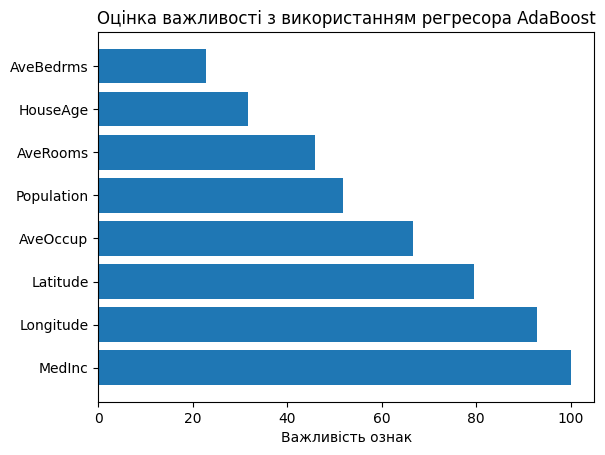

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Завантаження даних з Каліфорнійським житлом
housing = fetch_california_housing()

# Перемішування даних
X, y = shuffle(housing.data, housing.target, random_state=7)

# Розбиваємо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Модель на основі регресора AdaBoost
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
regressor.fit(X_train, y_train)

# Оцінка ефективності регресора
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("ADABOOST REGRESSOR")
print("Mean squared error:", round(mse, 2))
print("Explained variance score:", round(evs, 2))

# Отримуємо важливість ознак
feature_importances = regressor.feature_importances_
feature_names = housing.feature_names

# Нормалізуємо важливість ознак
feature_importances = 100.0 * (feature_importances / max(feature_importances))

# Сортуємо ознаки за важливістю
index_sorted = np.argsort(feature_importances)[::-1] # Sort in descending order

# Розміщення міток уздовж осі X
pos = np.arange(index_sorted.shape[0]) + 0.5

# Побудова стовпчастої діаграми
plt.figure()
plt.barh(pos, feature_importances[index_sorted], align='center')
plt.yticks(pos, np.array(feature_names)[index_sorted])
plt.xlabel('Важливість ознак')
plt.title('Оцінка важливості з використанням регресора AdaBoost')
plt.show()

Task 5

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesRegressor

# Завантажимо дані із файлу traffic_data.txt
input_file = 'traffic_data.txt'
data = []

with open(input_file, 'r') as f:
  for line in f.readlines():
    items = line.strip().split(',')
    data.append(items)
data = np.array(data)

# Нечислові ознаки потребують кодування
label_encoder = []
X_encoded = np.empty(data.shape, dtype=object)

for i, item in enumerate(data[0]):
  if item.isdigit():
    X_encoded[:, i] = data[:, i]
  else:
    label_encoder.append(preprocessing.LabelEncoder())
    X_encoded[:, i] = label_encoder[-1].fit_transform(data[:, i])

# Розділення на ознаки та мітки
X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

# Розбиття даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# Регресор на основі гранично випадкових лісів
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
regressor = ExtraTreesRegressor(**params)
regressor.fit(X_train, y_train)

# Обчислення характеристик ефективності регресора на тестових даних
y_pred = regressor.predict(X_test)
print("Mean absolute error:", round(mean_absolute_error(y_test, y_pred), 2))

# Тестування кодування на одному прикладі
test_datapoint = ['Saturday', '10:20', 'Atlanta', 'no']
test_datapoint_encoded = [-1] * len(test_datapoint)
count = 0

for i, item in enumerate(test_datapoint):
  if not item.isdigit():
    test_datapoint_encoded[i] = label_encoder[count].transform([item])[0]
    count += 1
  else:
    test_datapoint_encoded[i] = int(item)

test_datapoint_encoded = np.array(test_datapoint_encoded)

# Прогнозування трафіку
print("Predicted traffic:", int(regressor.predict([test_datapoint_encoded])[0]))

Mean absolute error: 7.42
Predicted traffic: 26
